In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from IPython.display import display, Latex

In [2]:
df = pd.read_csv('../results/output.csv')
df['sampling'] = df['sampling'].replace({'normal_at_min': 'Normal', 'uniform': 'Uniform'})

col_map_sns = {'box' : 'Box',
           'ch': 'CH',
           'chplus':r'CH$^+$',
           'chp.05':r'CH$^+_{0.05}$',
           'chp.1':r'CH$^+_{0.10}$',
           'isofor':'IsoFor'}
df['v_domain'] = df['v_domain'].replace(col_map_sns)
df.head()

,func,noise,sampling,sample_sz,seed,learning,v_domain,modval_modsol,truval_modsol,funval_err,optsol_err,optval_err,opt_setup_time,opt_opt_time,ML_train_time,R2_score
0,beale,0.0,Normal,1000,2023,forest,Box,2.152398,1.104498,1.047900,1.353093,2.152398,0.728047,0.392749,0.328566,0.938916
1,beale,0.0,Normal,1000,2023,forest,CH,2.152398,0.606251,1.546147,1.066877,2.152398,0.730197,0.794865,0.328566,0.938916
2,beale,0.0,Normal,1000,2023,forest,CH$^+$,2.152398,1.002497,1.149901,1.313069,2.152398,0.740183,0.761531,0.328566,0.938916
3,beale,0.0,Normal,1000,2023,forest,IsoFor,2.152398,0.297833,1.854565,0.874175,2.152398,15.555727,1.414174,0.328566,0.938916
4,beale,0.0,Normal,1000,2023,forest,CH$^+_{0.05}$,2.152398,0.177445,1.974953,0.090352,2.152398,0.565199,0.325046,-1.000000,-1.000000


In [3]:
df_low = df[df['func'] != 'rotated_hyper_ellipsoid']
df_low = df_low[df_low['func'] != 'rastrigin2d']
df_low['func'].unique()

array(['beale', 'peaks', 'griewank', 'powell', 'quintic', 'qing',
       'rastrigin10d'], dtype=object)

In [4]:
df_log = df_low.copy()
df_log[['funval_err', 'optsol_err', 'optval_err']] = np.log(df_log[['funval_err', 'optsol_err', 'optval_err']])
df_log.head()

,func,noise,sampling,sample_sz,seed,learning,v_domain,modval_modsol,truval_modsol,funval_err,optsol_err,optval_err,opt_setup_time,opt_opt_time,ML_train_time,R2_score
0,beale,0.0,Normal,1000,2023,forest,Box,2.152398,1.104498,0.046788,0.302393,0.766583,0.728047,0.392749,0.328566,0.938916
1,beale,0.0,Normal,1000,2023,forest,CH,2.152398,0.606251,0.435766,0.064736,0.766583,0.730197,0.794865,0.328566,0.938916
2,beale,0.0,Normal,1000,2023,forest,CH$^+$,2.152398,1.002497,0.139676,0.272367,0.766583,0.740183,0.761531,0.328566,0.938916
3,beale,0.0,Normal,1000,2023,forest,IsoFor,2.152398,0.297833,0.617650,-0.134474,0.766583,15.555727,1.414174,0.328566,0.938916
4,beale,0.0,Normal,1000,2023,forest,CH$^+_{0.05}$,2.152398,0.177445,0.680545,-2.404042,0.766583,0.565199,0.325046,-1.000000,-1.000000


In [5]:
df_sampling = df_log.pivot(index=['func', 'noise', 'sample_sz', 'seed', 'learning', 'v_domain'],
                        columns='sampling',
                        values='funval_err').reset_index()
df_sampling['ratio'] = df_sampling['Uniform'] - df_sampling['Normal']
df_sampling

sampling,func,noise,sample_sz,seed,learning,v_domain,Normal,Uniform,ratio
0,beale,0.0,500,2023,forest,Box,0.306345,7.604280,7.297935
1,beale,0.0,500,2023,forest,CH,0.130840,7.604280,7.473440
2,beale,0.0,500,2023,forest,CH$^+$,0.193624,3.694265,3.500641
3,beale,0.0,500,2023,forest,CH$^+_{0.05}$,0.711498,6.430367,5.718870
4,beale,0.0,500,2023,forest,CH$^+_{0.10}$,0.730438,6.430439,5.700000
...,...,...,...,...,...,...,...,...,...
113395,rastrigin10d,0.2,1500,2122,net,CH,4.254304,2.837373,-1.416931
113396,rastrigin10d,0.2,1500,2122,net,CH$^+$,3.895945,2.495632,-1.400313
113397,rastrigin10d,0.2,1500,2122,net,CH$^+_{0.05}$,3.652450,3.362215,-0.290236
113398,rastrigin10d,0.2,1500,2122,net,CH$^+_{0.10}$,4.586327,2.837373,-1.748954


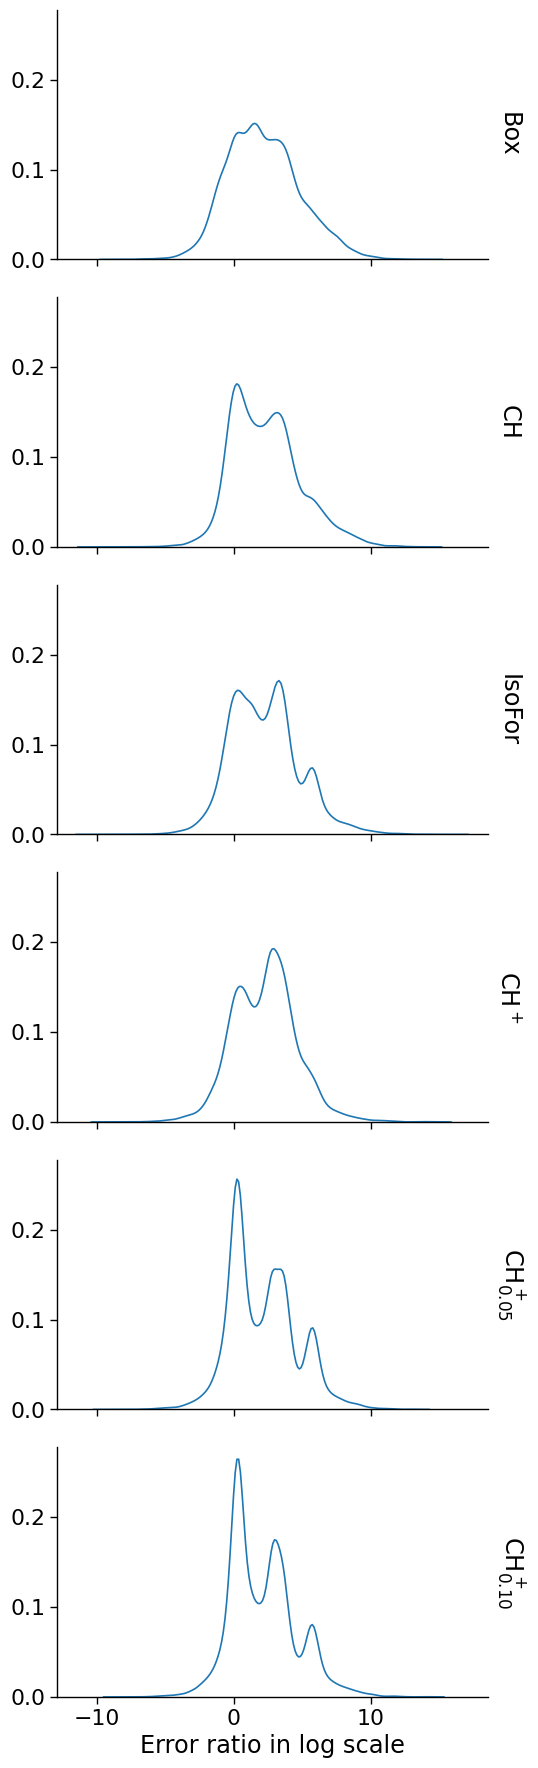

In [6]:
sns.set_context("paper", font_scale=1.8)

col_order = ['Box', 'CH', 'IsoFor', r'CH$^+$', r'CH$^+_{0.05}$', r'CH$^+_{0.10}$']

g = sns.FacetGrid(df_sampling,
                  #col='ratio',
                  row='v_domain',
                  #hue='sampling',
                  row_order=col_order,
                  aspect=2,
                  margin_titles=True,
                  sharex=True,
                  sharey=True)

# Map histograms to each facet with Col4 values
#g.map(sns.histplot, 'funval_err', bins=10, kde=True, alpha=0.5)
g.map(sns.kdeplot, 'ratio', alpha=1)

# Adjust labels and titles
g.set_axis_labels("Error ratio in log scale", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
#g.add_legend(title="Sampling Method")

plt.savefig('../results/figures/section_s3_sampling_ratio.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()

In [7]:
df_noise = df_log.pivot(index=['func', 'sampling', 'sample_sz', 'seed', 'learning', 'v_domain'],
                        columns='noise',
                        values='funval_err').reset_index()
df_noise['Function Value Error 1'] = df_noise[0.1] - df_noise[0.0]
df_noise['Function Value Error 2'] = df_noise[0.2] - df_noise[0.0]

In [8]:
tmp = df_noise.groupby(['v_domain'])[['Function Value Error 1', 'Function Value Error 2']].skew().round(2).map(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))
text = tmp.to_latex(index=True)
with open('../results/tables/section_s3_sampling_ratio_skewness.tex', 'w') as f:
    f.write(text)

In [9]:
tmp = df_noise.groupby(['v_domain'])[['Function Value Error 1', 'Function Value Error 2']].aggregate(kurtosis).round(2).map(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))
text = tmp.to_latex(index=True)
with open('../results/tables/section_s3_sampling_ratio_kurtosis.tex', 'w') as f:
    f.write(text)

In [10]:
df_noise_melted = df_noise.melt(id_vars=['func', 'sampling', 'sample_sz', 'seed', 'learning', 'v_domain'],
                          value_vars=['Function Value Error 1', 'Function Value Error 2'])
df_noise_melted

,func,sampling,sample_sz,seed,learning,v_domain,noise,value
0,beale,Normal,500,2023,forest,Box,Function Value Error 1,0.955222
1,beale,Normal,500,2023,forest,CH,Function Value Error 1,1.128377
2,beale,Normal,500,2023,forest,CH$^+$,Function Value Error 1,0.993927
3,beale,Normal,500,2023,forest,CH$^+_{0.05}$,Function Value Error 1,0.639123
4,beale,Normal,500,2023,forest,CH$^+_{0.10}$,Function Value Error 1,0.629712
...,...,...,...,...,...,...,...,...
151195,rastrigin10d,Uniform,1500,2122,net,CH,Function Value Error 2,-0.107818
151196,rastrigin10d,Uniform,1500,2122,net,CH$^+$,Function Value Error 2,-0.259766
151197,rastrigin10d,Uniform,1500,2122,net,CH$^+_{0.05}$,Function Value Error 2,-0.482046
151198,rastrigin10d,Uniform,1500,2122,net,CH$^+_{0.10}$,Function Value Error 2,1.144181


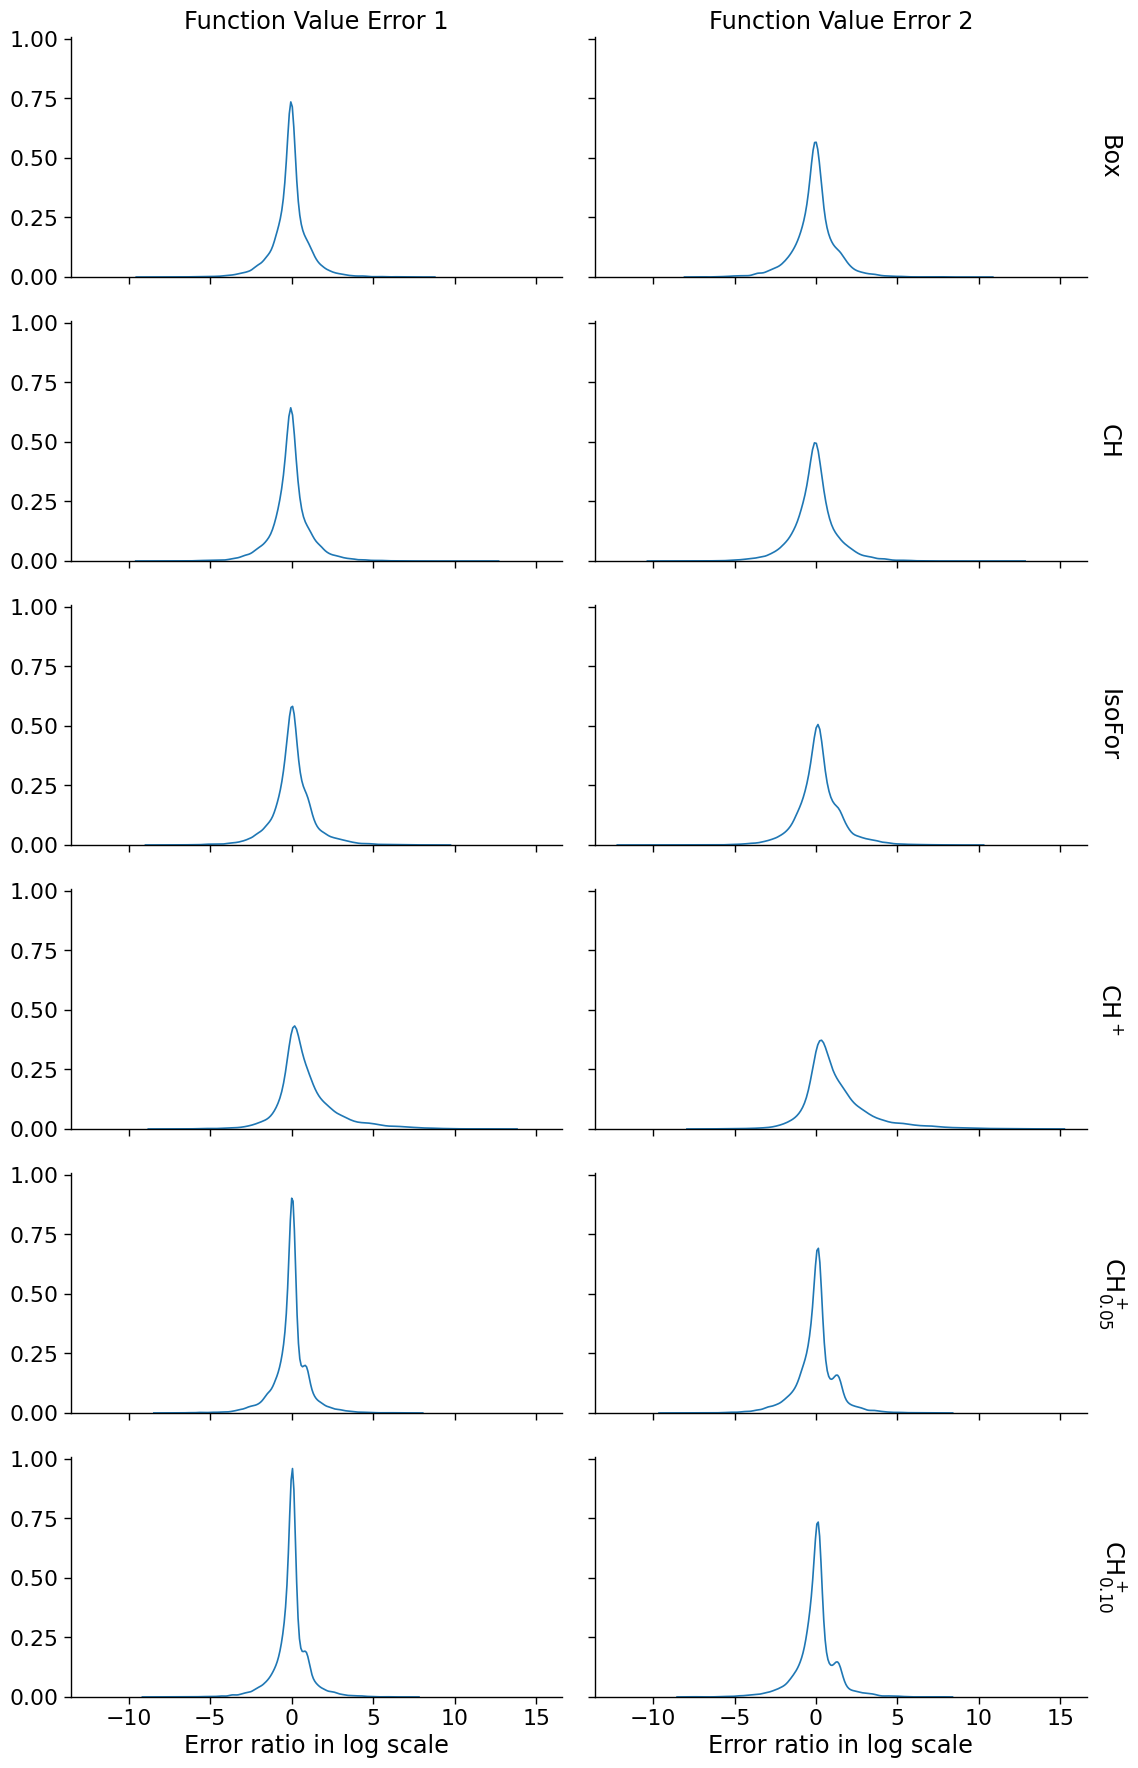

In [11]:
sns.set_context("paper", font_scale=1.8)

g = sns.FacetGrid(df_noise_melted,
                  col='noise',
                  row='v_domain',
                  #hue='sampling',
                  row_order=col_order,
                  aspect=2,
                  margin_titles=True,
                  sharex=True,
                  sharey=True)

# Map histograms to each facet with Col4 values
#g.map(sns.histplot, 'funval_err', bins=10, kde=True, alpha=0.5)
g.map(sns.kdeplot, 'value', alpha=1)

# Adjust labels and titles
g.set_axis_labels("Error ratio in log scale", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
#g.add_legend(title="Sampling Method")

plt.savefig('../results/figures/section_s3_noise_ratio.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()



In [12]:
df_sample_sz = df_log.pivot(index=['func', 'noise', 'sampling', 'seed', 'learning', 'v_domain'],
                        columns='sample_sz',
                        values='funval_err').reset_index()
df_sample_sz['Function Value Error 1'] = df_sample_sz[1000] - df_sample_sz[500]
df_sample_sz['Function Value Error 2'] = df_sample_sz[1500] - df_sample_sz[500]

df_sample_sz

sample_sz,func,noise,sampling,seed,learning,v_domain,500,1000,1500,Function Value Error 1,Function Value Error 2
0,beale,0.0,Normal,2023,forest,Box,0.306345,0.046788,0.170130,-0.259557,-0.136215
1,beale,0.0,Normal,2023,forest,CH,0.130840,0.435766,-1.090395,0.304926,-1.221235
2,beale,0.0,Normal,2023,forest,CH$^+$,0.193624,0.139676,-3.085785,-0.053948,-3.279409
3,beale,0.0,Normal,2023,forest,CH$^+_{0.05}$,0.711498,0.680545,0.656396,-0.030953,-0.055102
4,beale,0.0,Normal,2023,forest,CH$^+_{0.10}$,0.730438,0.688893,0.652471,-0.041546,-0.077967
...,...,...,...,...,...,...,...,...,...,...,...
75595,rastrigin10d,0.2,Uniform,2122,net,CH,3.599078,3.489618,2.837373,-0.109460,-0.761705
75596,rastrigin10d,0.2,Uniform,2122,net,CH$^+$,2.024298,3.688056,2.495632,1.663758,0.471334
75597,rastrigin10d,0.2,Uniform,2122,net,CH$^+_{0.05}$,1.291764,3.503523,3.362215,2.211759,2.070451
75598,rastrigin10d,0.2,Uniform,2122,net,CH$^+_{0.10}$,1.900581,3.451465,2.837373,1.550883,0.936792


In [13]:
tmp = df_sample_sz.groupby(['v_domain'])[['Function Value Error 1', 'Function Value Error 2']].skew().round(2).map(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))
text = tmp.to_latex(index=True)
with open('../results/tables/section_s3_sample_sz_ratio_skewness.tex', 'w') as f:
    f.write(text)

In [14]:
tmp = df_sample_sz.groupby(['v_domain'])[['Function Value Error 1', 'Function Value Error 2']].aggregate(kurtosis).round(2).map(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))
text = tmp.to_latex(index=True)
with open('../results/tables/section_s3_sample_sz_ratio_kurtosis.tex', 'w') as f:
    f.write(text)

In [15]:
df_sample_sz_melted = df_sample_sz.melt(id_vars=['func', 'noise', 'sampling', 'seed', 'learning', 'v_domain'],
                          value_vars=['Function Value Error 1', 'Function Value Error 2'])
df_sample_sz_melted

,func,noise,sampling,seed,learning,v_domain,sample_sz,value
0,beale,0.0,Normal,2023,forest,Box,Function Value Error 1,-0.259557
1,beale,0.0,Normal,2023,forest,CH,Function Value Error 1,0.304926
2,beale,0.0,Normal,2023,forest,CH$^+$,Function Value Error 1,-0.053948
3,beale,0.0,Normal,2023,forest,CH$^+_{0.05}$,Function Value Error 1,-0.030953
4,beale,0.0,Normal,2023,forest,CH$^+_{0.10}$,Function Value Error 1,-0.041546
...,...,...,...,...,...,...,...,...
151195,rastrigin10d,0.2,Uniform,2122,net,CH,Function Value Error 2,-0.761705
151196,rastrigin10d,0.2,Uniform,2122,net,CH$^+$,Function Value Error 2,0.471334
151197,rastrigin10d,0.2,Uniform,2122,net,CH$^+_{0.05}$,Function Value Error 2,2.070451
151198,rastrigin10d,0.2,Uniform,2122,net,CH$^+_{0.10}$,Function Value Error 2,0.936792


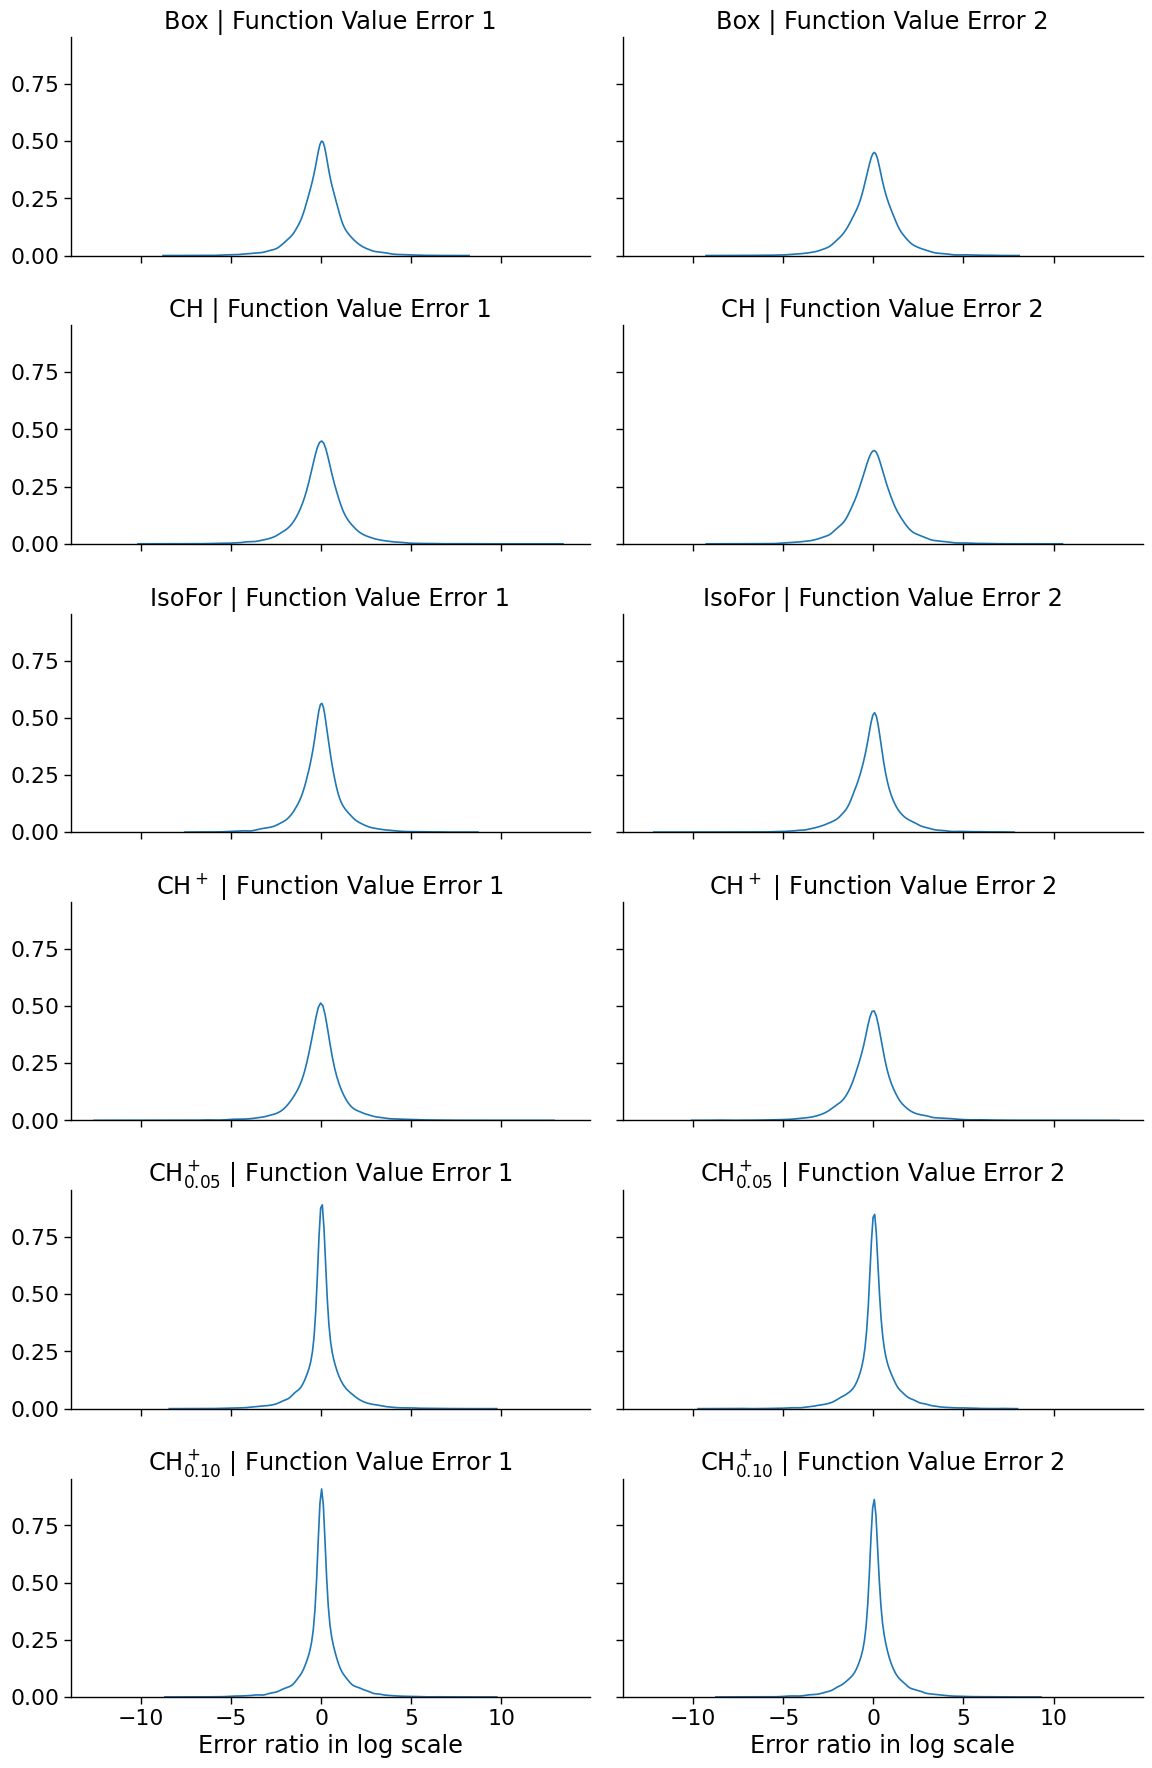

In [16]:
sns.set_context("paper", font_scale=1.8)

g = sns.FacetGrid(df_sample_sz_melted,
                  col='sample_sz',
                  row='v_domain',
                  #hue='sampling',
                  row_order=col_order,
                  aspect=2,
                  sharex=True,
                  sharey=True)

# Map histograms to each facet with Col4 values
#g.map(sns.histplot, 'funval_err', bins=10, kde=True, alpha=0.5)
g.map(sns.kdeplot, 'value', alpha=1)

# Adjust labels and titles
g.set_axis_labels("Error ratio in log scale", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
#g.add_legend(title="Sampling Method")

plt.savefig('../results/figures/section_s3_sample_sz_ratio.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()



In [17]:
df = pd.read_csv('../results/output.csv')
df_low = df[df['func'] != 'rotated_hyper_ellipsoid']
df_low = df_low[df_low['func'] != 'rastrigin2d']

poly
False    0.505863
True     0.193417
Name: chplus, dtype: float64


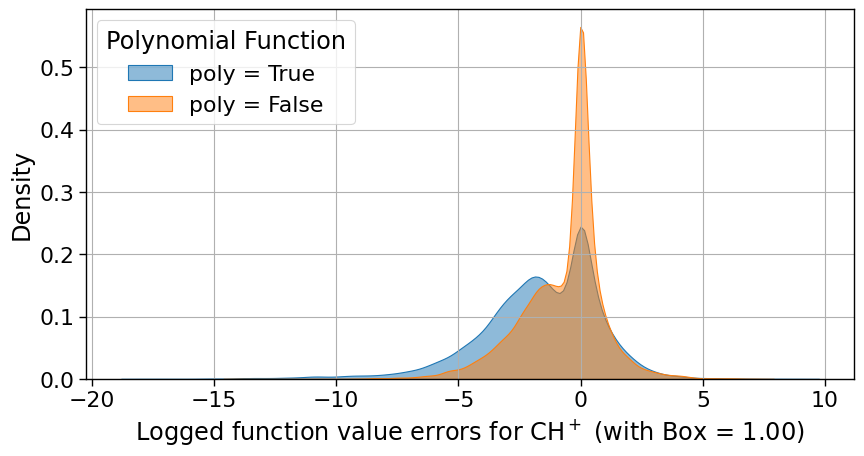

In [18]:
# Filter rows where v_domain is 'box' or 'chplus'
df_sup = df_low[df_low['v_domain'].isin(['box', 'chplus'])]

# Select specific columns
df_sup = df_sup[['func', 'noise', 'sampling', 'sample_sz', 'seed', 'learning', 'v_domain', 'funval_err']]

# Pivot the DataFrame
df_sup = df_sup.pivot_table(index=['func', 'noise', 'sampling', 'sample_sz', 'seed', 'learning'],
                            columns='v_domain',
                            values='funval_err').reset_index()

# Compute ratio and drop 'box'
df_sup['chplus'] = df_sup['chplus'] / df_sup['box']
df_sup = df_sup.drop(columns='box')

# Add 'poly' column as a boolean
poly_funcs = {"beale", "qing", "quintic", "powell"}
df_sup['poly'] = df_sup['func'].isin(poly_funcs).astype('category')

# Group by 'poly' and compute exp(mean(log(chplus)))
summary = df_sup.groupby('poly', observed=True)['chplus'].apply(lambda x: np.exp(np.mean(np.log(x))))
print(summary)

# Create log(chplus)
df_sup['log_chplus'] = np.log(df_sup['chplus'])

# Filter for the poly values you're interested in (e.g., poly=True and poly=False)
poly_subset = df_sup[df_sup['poly'].isin([True, False])]

# Create the plot with two different colors for poly = True and poly = False
sns.kdeplot(data=poly_subset[poly_subset['poly'] == True], x='log_chplus', label='poly = True', fill=True, alpha=0.5)
sns.kdeplot(data=poly_subset[poly_subset['poly'] == False], x='log_chplus', label='poly = False', fill=True, alpha=0.5)

# Add labels and grid
plt.xlabel("Logged function value errors for " r'CH$^+$' " (with Box = 1.00)")
plt.ylabel("Density")
plt.legend(title='Polynomial Function')
plt.grid(True)
#plt.tight_layout()
plt.subplots_adjust(left = -0.6, right = 0.6) #left = 0, right=0, bottom = 0, top = 0)
plt.savefig('../results/figures/section_s3_funvalerr_if_poly.png', dpi = 300, bbox_inches = 'tight')
plt.show()